<a href="https://colab.research.google.com/github/Sachin-934/SCT_DS_2/blob/main/skillcraft_eda_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
pd.read_csv('/train (1).csv')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
import pandas as pd
df = pd.read_csv('/content/train (1).csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
# Check missing values
print(df.isnull().sum())

# Fill or drop missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)  # too many nulls


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


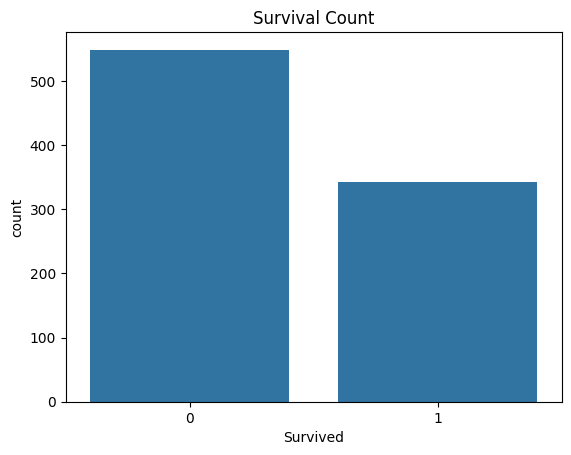

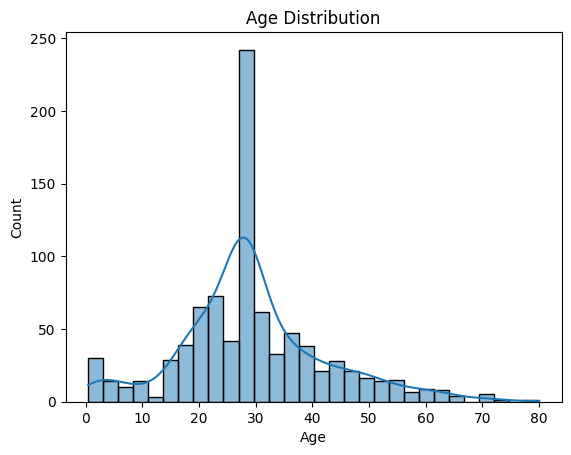

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Survived')
plt.title("Survival Count")
plt.show()

sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


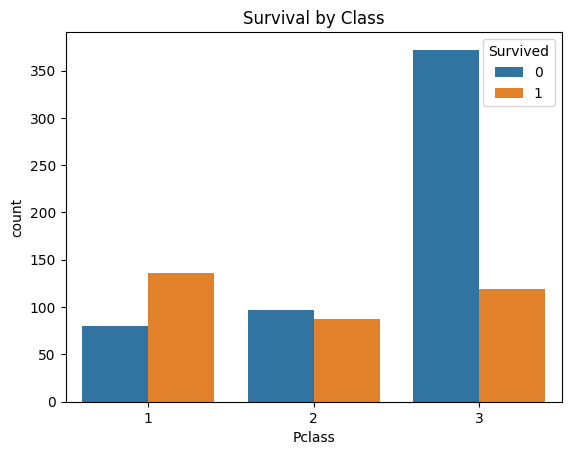

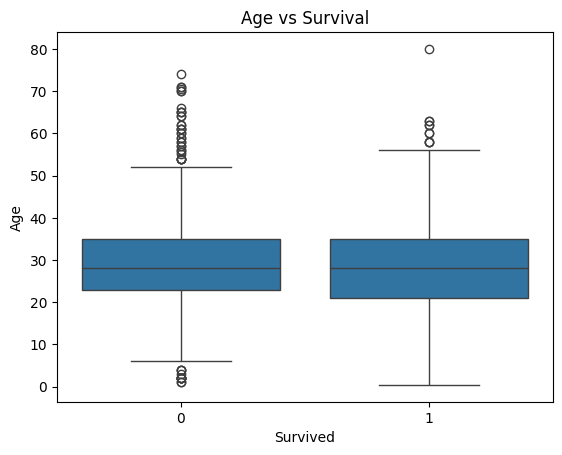

In [ ]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival by Class")
plt.show()

sns.boxplot(data=df, x='Survived', y='Age')
plt.title("Age vs Survival")
plt.show()


In [2]:
import pandas as pd
df = pd.read_csv('/content/train (1) (1).csv')
df.groupby('Sex')['Survived'].mean()



,Survived
Sex,
female,0.742038
male,0.188908


<Axes: xlabel='Pclass', ylabel='Survived'>

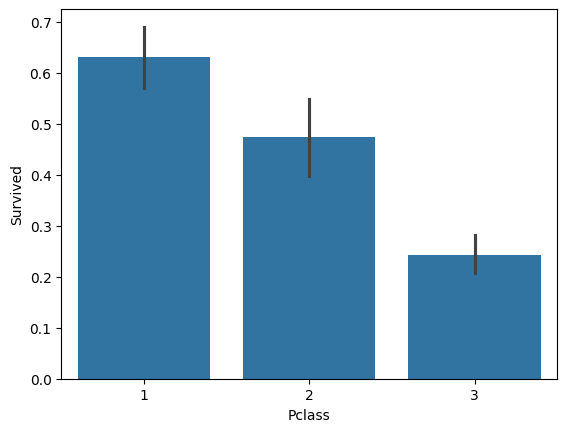

In [3]:
import seaborn as sns
sns.barplot(x='Pclass', y='Survived', data=df)


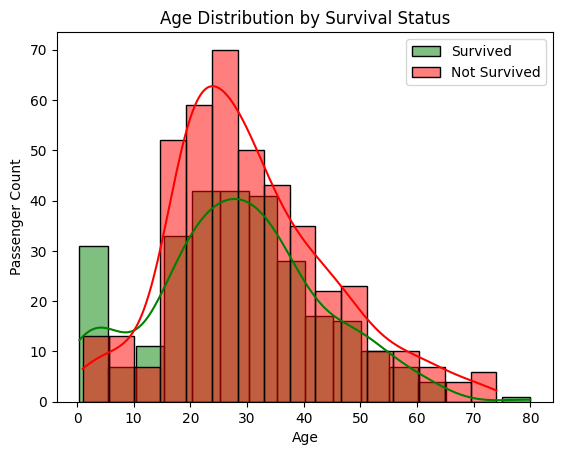

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot
sns.histplot(df[df['Survived'] == 1]['Age'], color='green', label='Survived', kde=True)
sns.histplot(df[df['Survived'] == 0]['Age'], color='red', label='Not Survived', kde=True)

# Labels and Title
plt.title("Age Distribution by Survival Status")
plt.xlabel("Age")
plt.ylabel("Passenger Count")
plt.legend()  # Show the labels on the plot

plt.show()


In [5]:
pd.crosstab(df['Sex'], df['Survived'])


Survived,0,1
Sex,,
female,81,233
male,468,109


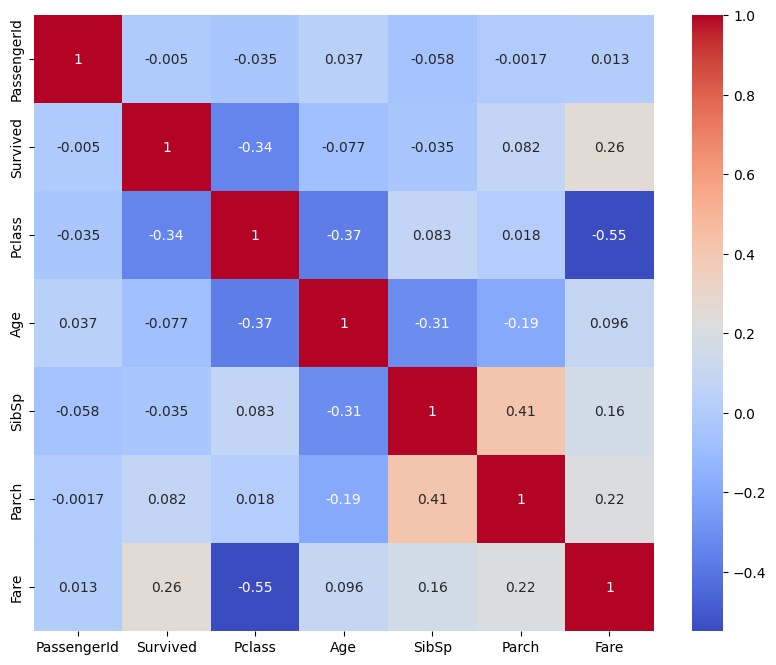

In [8]:
# Pandas ≥1.5 you can do:
corr = df.corr(numeric_only=True)

# Or more generally:
num_df = df.select_dtypes(include=['int64','float64'])
corr = num_df.corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()
